In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import data as data
import seaborn
import re
%matplotlib inline

In [2]:
#Show all columns
#pd.set_option('display.max_columns', None)

In [3]:
# respondent = []
respondent = pd.read_csv('data/atusresp_2014.dat', sep=',')

roster_list = [0, 1, 2, 3, 4]
roster = pd.read_csv('data/atusrost_2014.dat', sep=',', usecols=roster_list)

activity_list = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22]
activity = pd.read_csv('data/atusact_2014.dat', sep=',', usecols=activity_list)

who_list = [0, 1, 3, 4]
who = pd.read_csv('data/atuswho_2014.dat', sep=',', usecols=who_list)

elder_list = [0, 1, 2, 3, 4, 5, 6, 7]
elder = pd.read_csv('data/atusrostec_2014.dat', sep=',', usecols=elder_list)

#summary = []
summary = pd.read_csv('data/atussum_2014.dat', sep=',')




In [26]:
#respondent

#roster
#Household ID, family member, age, relationship, sex

#activity
#Household ID, activity, time spend 

#who
#household ID, activity number, 

#elder

#summary
# summary.rename(columns={'tucaseid':'Household ID', 'TUFINLWGT':'Weighted',
# 'TRYHHCHILD':'Youngest Child', 'TEAGE':'AGE', 'TESEX': 'SEX', 'PEEDUCA':'EDU',
# 'PTDTRACE':'RACE', 'GTMETSTA':'METRO', 'PEHSPNON': 'HISP','TELFS':'Labor Force'})

In [21]:
#Create function to change TESEX values
def sex_changes(value):
    for sex in value:
        if sex == '1':
            return "Male"
        if sex == '2':
            return "Female"

In [20]:
#Change values type to string to iterate. 
roster.TESEX = roster.TESEX.astype(str)

In [26]:
roster.TESEX = roster.TESEX.apply(lambda x: sex_changes(x))

In [27]:
sex_count = roster['TESEX']

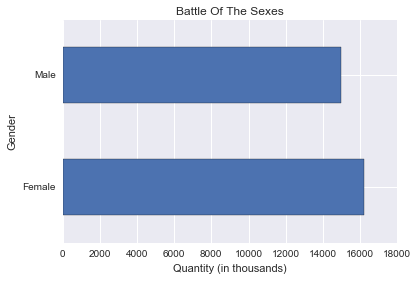

In [30]:
plt.xlabel('Quantity (in thousands)')
plt.ylabel('Gender')
sex_count.value_counts().plot.barh(title="Battle Of The Sexes")

In [30]:
def sex_change(row):
    for sex in row:
        if sex == 1:
            return "M"
        if sex == 2:
            return "F"


In [31]:
updated = sex_change(sex_count)

In [15]:
roster

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX
0,20140101140007,1,20,19,2
1,20140101140007,2,19,21,1
2,20140101140007,3,0,22,1
3,20140101140011,1,16,18,2
4,20140101140011,2,33,24,2
5,20140101140028,1,65,18,2
6,20140101140028,2,38,28,1
7,20140101140028,3,36,22,2
8,20140101140028,5,5,23,2
9,20140101140028,6,13,23,1


In [36]:
age.sort_values(by=)

SyntaxError: invalid syntax (<ipython-input-36-4178bd3a056c>, line 1)

NameError: name 'age_sorted' is not defined

In [ ]:
#roster_copy.rename(columns={'TUCASEID': 'Household', 'TESEX': 'SEX', 'TEA' })

In [52]:
# PEEDUCA

# Valid Entries: 
# 31 Less than 1st grade
# 32 1st, 2nd, 3rd, or 4th grade
# 33 5th or 6th grade
# 34 7th or 8th grade
# 35 9th grade
# 36 10th grade
# 37 11th grade
# 38 12th grade - no diploma
# 39 High school graduate - diploma or equivalent (GED)
# 40 Some college but no degree
# 41 Associate degree - occupational/vocational
# 42 Associate degree - academic program
# 43 Bachelor's degree (BA, AB, BS, etc.)
# 44 Master's degree (MA, MS, MEng, MEd, MSW, etc.)
# 45 Professional school degree (MD, DDS, DVM, etc.)
# 46 Doctoral degree (PhD, EdD, etc.) 

# TELFS 

# Edited Universe: All respondents
# Valid Entries: 
# 1 Employed - at work
# 2 Employed - absent
# 3 Unemployed - on layoff
# 4 Unemployed - looking
# 5 Not in labor force


In [ ]:
#roster_copy.rename(columns={'TUCASEID': 'Household', 'TESEX': 'SEX', 'TEA' })

In [ ]:
4+2

In [218]:
da_verdict = roster['TESEX'] == 1

In [222]:
da_verdict.describe()

count     31199
unique        2
top       False
freq      16210
Name: TESEX, dtype: object

In [65]:
#roster['TESEX'].head(20)

In [66]:
#roster.head(20).plot.barh()

In [29]:
# TERRP
# 18 Self
# 19 Self
# 20 Spouse
# 21 Unmarried partner
# 22 Own household child
# 23 Grandchild
# 24 Parent
# 25 Brother/sister
# 26 Other related person
# 27 Foster child
# 28 Housemate/roommate
# 29 Roomer/boarder
# 30 Other nonrelative
# 40 Own nonhousehold child < 18


In [ ]:
TEELDUR Edited: how long have you provided care to [NAME]? EC Roster File
Edited Universe: All eldercare recipients
Valid Entries: 
1 0 to 5 months
2 6 to 11 months
3 1 year
4 More than a year
* Note: The name is filled with the information collected from the TUELWHO question
TEELWHO Edited: who did you give this care to? EC Roster Fil
    
    TEELWHO Edited: who did you give this care to? EC Roster File
Edited Universe: All eldercare recipients
Valid Entries: 
20 Spouse
21 Unmarried partner
22 Own household child
23 Grandchild
24 Parent
25 Brother/sister
26 Other related person
27 Foster child
28 Housemate/roommate
29 Roomer/boarder
30 Other nonrelative
33 Mother
34 Father
35 Spouse
36 Partner
37 Brother
38 Sister
39 Mother-in-law
40 Father-in-law
41 Aunt
42 Uncle
43 Friend
44 Neighbor
47 Grandmother/Great-grandmother
48 Grandfather/Great-grandfather
49 Other related person
56 Other non-relative
All codes of 30 or less refer to people living inside of the respondent's household
Beginning in January 2013, values 47, 48, 49, and 56 were added; valu